Name : Omkar Awari

Branch : ENTC

PRN: 202101070094

 **Problem Statement** :Write a algorithm and program to implement hill climbing for suitable example

example : Travelling Sales Person Problem

Enter the number of the start city (0 to 4): 4
Enter the number of the goal city (0 to 4): 1
Route 1: [4, 0, 2, 3, 1], Cost: 336.07
Route 2: [4, 0, 3, 2, 1], Cost: 318.41
Route 3: [4, 2, 0, 3, 1], Cost: 312.14
Route 4: [4, 2, 3, 0, 1], Cost: 221.26
Route 5: [4, 3, 0, 2, 1], Cost: 336.71
Route 6: [4, 3, 2, 0, 1], Cost: 263.49

Optimal Path:
[4, 2, 3, 0, 1]
Total Distance: 221.26


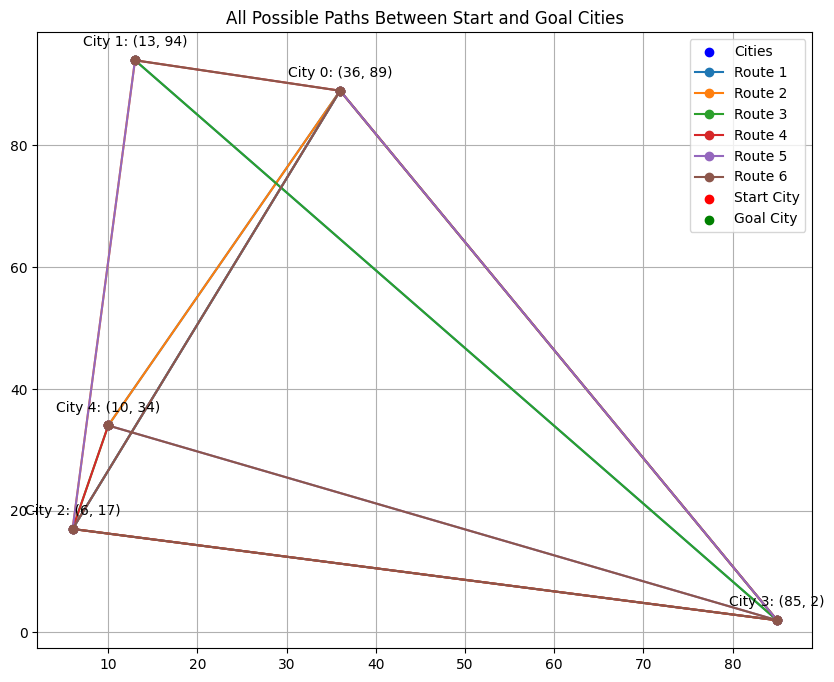

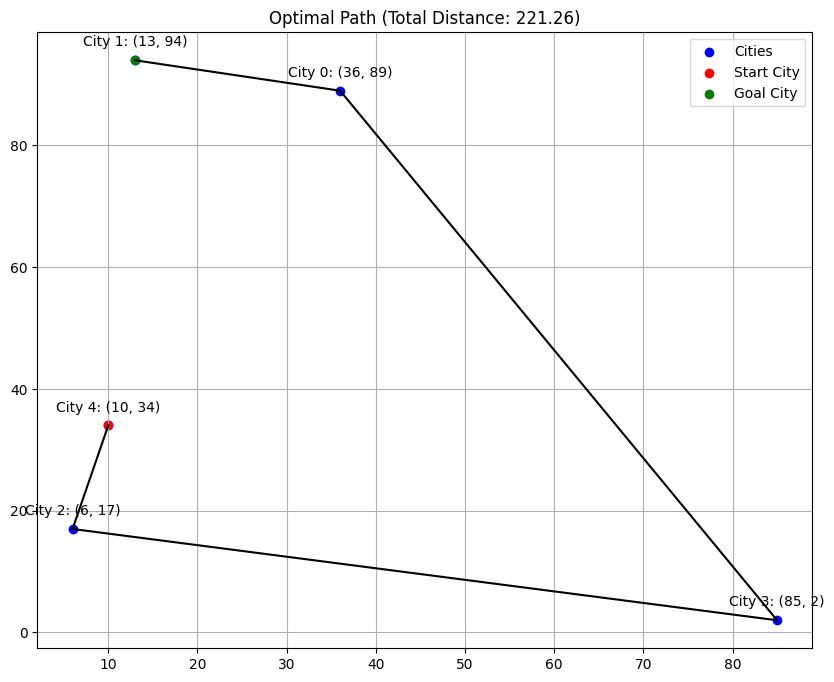

In [3]:
import itertools
import math
import matplotlib.pyplot as plt
import random

# Function to calculate the Euclidean distance between two points
def calculate_distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# Function to calculate the total distance of a path
def calculate_total_distance(path, cities):
    total_distance = 0
    for i in range(len(path) - 1):
        city1 = path[i]
        city2 = path[i + 1]
        distance = calculate_distance(cities[city1], cities[city2])
        total_distance += distance
    return total_distance

# Generate all possible routes from start to end city
def generate_possible_routes(start, end, num_cities):
    all_cities = set(range(num_cities))
    all_cities.discard(start)
    all_cities.discard(end)
    possible_routes = []
    for permutation in itertools.permutations(all_cities):
        route = [start] + list(permutation) + [end]
        possible_routes.append(route)
    return possible_routes

# Calculate the costs of all possible routes
def calculate_possible_route_costs(cities, possible_routes):
    route_costs = []
    for route in possible_routes:
        cost = calculate_total_distance(route, cities)
        route_costs.append(cost)
    return route_costs

# Plot all possible paths between start and end city
def plot_all_possible_paths(cities, possible_routes, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(10, 8))

    # Plot city coordinates
    for i, (x_coord, y_coord) in enumerate(cities):
        plt.annotate(f'City {i}: ({x_coord}, {y_coord})', (x_coord, y_coord),
                     textcoords="offset points", xytext=(0, 10), ha='center')

    # Plot the cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot all possible routes with different colors
    for i, route in enumerate(possible_routes):
        plt.plot([cities[route[j]][0] for j in range(len(route))],
                 [cities[route[j]][1] for j in range(len(route))], 'o-', label=f'Route {i + 1}')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title('All Possible Paths Between Start and Goal Cities')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

# Plot the cities and the optimal path in a separate graph
def plot_cities_and_optimal_path(cities, optimal_path, start_city, goal_city):
    x, y = zip(*cities)
    plt.figure(figsize=(10, 8))

    # Plot city coordinates
    for i, (x_coord, y_coord) in enumerate(cities):
        plt.annotate(f'City {i}: ({x_coord}, {y_coord})', (x_coord, y_coord),
                     textcoords="offset points", xytext=(0, 10), ha='center')

    # Plot the cities in blue
    plt.scatter(x, y, marker='o', color='b', label='Cities')

    # Plot the optimal path in black
    for i in range(len(optimal_path) - 1):
        plt.plot([cities[optimal_path[i]][0], cities[optimal_path[i + 1]][0]],
                 [cities[optimal_path[i]][1], cities[optimal_path[i + 1]][1]], 'k-')

    # Mark start city as red
    plt.scatter(cities[start_city][0], cities[start_city][1], marker='o', color='r', label='Start City')

    # Mark goal city as green
    plt.scatter(cities[goal_city][0], cities[goal_city][1], marker='o', color='g', label='Goal City')

    plt.title(f'Optimal Path (Total Distance: {calculate_total_distance(optimal_path, cities):.2f})')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

# Hill climbing algorithm to find the optimal path
def hill_climbing(cities, current_route):
    current_cost = calculate_total_distance(current_route, cities)

    # Initialize the best route as the current route
    best_route = current_route[:]
    best_cost = current_cost

    # Keep track of whether a better route was found
    improved = True

    while improved:
        improved = False

        for i in range(1, len(current_route) - 2):
            for j in range(i + 2, len(current_route)):
                new_route = current_route[:i] + current_route[i:j][::-1] + current_route[j:]
                new_cost = calculate_total_distance(new_route, cities)

                if new_cost < best_cost:
                    best_route = new_route[:]
                    best_cost = new_cost
                    improved = True

        if improved:
            current_route = best_route[:]
            current_cost = best_cost

    return best_route

if __name__ == "__main__":
    # Define the coordinates of cities
    city_coordinates = [(36, 89), (13, 94), (6, 17), (85, 2), (10, 34)]

    # Get the number of cities
    num_cities = len(city_coordinates)

    # Prompt the user to enter the start and goal cities
    start_city = int(input(f"Enter the number of the start city (0 to {num_cities - 1}): "))
    goal_city = int(input(f"Enter the number of the goal city (0 to {num_cities - 1}): "))

    # Generate all possible routes from start to goal city
    possible_routes = generate_possible_routes(start_city, goal_city, num_cities)
    route_costs = calculate_possible_route_costs(city_coordinates, possible_routes)

    # Find the optimal path using hill climbing
    initial_route = possible_routes[random.randint(0, len(possible_routes) - 1)]
    optimal_path = hill_climbing(city_coordinates, initial_route)

    # Print all possible routes and their costs
    for i, route in enumerate(possible_routes):
        cost = route_costs[i]
        print(f"Route {i + 1}: {route}, Cost: {cost:.2f}")

    # Print the optimal path and its total distance
    print("\nOptimal Path:")
    print(optimal_path)
    print(f"Total Distance: {calculate_total_distance(optimal_path, city_coordinates):.2f}")

    # Plot all possible paths between start and goal city
    plot_all_possible_paths(city_coordinates, possible_routes, start_city, goal_city)

    # Plot the cities and the optimal path in a separate graph
    plot_cities_and_optimal_path(city_coordinates, optimal_path, start_city, goal_city)



In the provided code, the hill climbing algorithm is used to find an improved route to solve the Traveling Salesman Problem (TSP). Here's how the algorithm is used in the code:

**Hill Climbing as an Improvement Heuristic:**

After generating all possible routes from the start city to the goal city, a random initial route is selected.
The initial route represents a possible solution to the TSP.

**Evaluating the Quality of the Initial Route:**

The quality of the initial route is evaluated by calculating the total distance of that route. This distance is the total Euclidean distance traveled when visiting cities in the order specified by the route.

**Iterative Improvement:**

The hill climbing algorithm seeks to iteratively improve the current route by making small changes.
It repeatedly considers two consecutive cities in the route (i and j) and reverses the order of the cities between them.
It computes the total distance of the new route after this modification and compares it to the best known route.
If the new route is better (i.e., shorter), it becomes the new best route, and the process continues.

**Termination:**

The algorithm keeps making these changes until no further improvement can be found (local optimum). At this point, the algorithm terminates.
Retaining the Best Route:

Throughout the process, the algorithm retains the best route and its corresponding total distance.

**Returning the Optimal Route:**

Once the algorithm has terminated, it returns the best route found during the iterative improvement process as the "optimal path."

**Displaying the Results:**

The code then prints the optimal path and its total distance.
It also uses the optimal path for graphical visualization.
